In [1]:
import warnings
import pandas as pd

from Yihui.yihui import Yihui
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:

# generate data.csv
with open("../Data/data.csv", "r") as f:
    data = pd.read_csv(f)
data['customer_no'] = str(data['customer_no'])

# loading Titanic dataset
# data = sns.load_dataset('titanic')
data.head()


customer_no  dlq_flag        v1  \
0  0        2.020070e+14\n1        2.020070e+14\n...       1.0  130.1491   
1  0        2.020070e+14\n1        2.020070e+14\n...       1.0  223.6068   
2  0        2.020070e+14\n1        2.020070e+14\n...       1.0  152.7525   
3  0        2.020070e+14\n1        2.020070e+14\n...       1.0  130.1491   
4  0        2.020070e+14\n1        2.020070e+14\n...       1.0  223.6068   

     v2     v3      v4        v5         v6    v7        v8  ...     v91  v92  \
0   0.0   10.0  0.6101   31.0048     0.5075  17.0  200.0000  ...  0.6923  4.0   
1  10.0   21.0  0.6897  110.0572     0.3129   0.0  139.7542  ...  0.7000  0.0   
2   2.0   31.0  0.6332   28.9861     0.2642   0.0  118.2338  ...  0.5476  1.0   
3  15.0  154.0  0.6086   26.5040 -1111.0000   0.0  130.6352  ...  0.5946  0.0   
4   1.0    4.0  0.4878  183.0612     0.2425  16.0  187.0829  ...  0.5556  0.0   

     v93       v94    v95       v96  v97       v98       v99  v100  
0  437.0    4.1852   86.0  182.4516  0.0   99.4065  105.8915   0.0  
1  365.0    1.5263  365.0   44.4582  1.0  149.8298  165.0496  11.0  
2  695.0    2.2121  421.0   19.6522  2.0   82.7296   84.9168   8.0  
3  845.0 -999.0000  845.0   30.5330  3.0   81.5751   66.1088  14.0  
4   45.0    3.8333   26.0   44.2018  0.0   67.7003   61.4452   2.0  

[5 rows x 102 columns]

In [3]:
# Create Yihui Class
yihui_project = Yihui(data,'dlq_flag')
print(yihui_project.data.head())

                                         customer_no  dlq_flag        v1  \
0  0        2.020070e+14\n1        2.020070e+14\n...       1.0  130.1491   
1  0        2.020070e+14\n1        2.020070e+14\n...       1.0  223.6068   
2  0        2.020070e+14\n1        2.020070e+14\n...       1.0  152.7525   
3  0        2.020070e+14\n1        2.020070e+14\n...       1.0  130.1491   
4  0        2.020070e+14\n1        2.020070e+14\n...       1.0  223.6068   

     v2     v3      v4        v5         v6    v7        v8  ...     v91  v92  \
0   0.0   10.0  0.6101   31.0048     0.5075  17.0  200.0000  ...  0.6923  4.0   
1  10.0   21.0  0.6897  110.0572     0.3129   0.0  139.7542  ...  0.7000  0.0   
2   2.0   31.0  0.6332   28.9861     0.2642   0.0  118.2338  ...  0.5476  1.0   
3  15.0  154.0  0.6086   26.5040 -1111.0000   0.0  130.6352  ...  0.5946  0.0   
4   1.0    4.0  0.4878  183.0612     0.2425  16.0  187.0829  ...  0.5556  0.0   

     v93       v94    v95       v96  v97       v98      

In [4]:
# 直接访问 Yihui 类的属性获取字符型和数值型变量的名字
categorical_vars_list = yihui_project.get_categorical_variables()
numeric_vars_list = yihui_project.get_numeric_variables()

print("Categorical Variables:", yihui_project.get_categorical_variables())
print("Numeric Variables:", yihui_project.get_numeric_variables())


Categorical Variables: ['customer_no']
Numeric Variables: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 'v67', 'v68', 'v69', 'v70', 'v71', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v96', 'v97', 'v98', 'v99', 'v100']


In [5]:
# eda 阶段

# 使用ydata_profiling 自动生成eda报告
# 根据dataset数据量大小，生成报告的时间会不同。建议慎重操作。
# yihui_project.eda_module.auto_eda_profiling()

In [6]:
# 快速自动分析数据集（无图）
eda_result = yihui_project.eda_module.auto_eda_simple()
print(eda_result)

             entropy  missing_pct  unique_count        mean     min  \
customer_no      0.0     0.000000           1.0         NaN     NaN   
v1               NaN     0.457894           NaN -302.661318 -1111.0   
v2               NaN     0.457894           NaN  -61.647200  -999.0   
v3               NaN     0.457894           NaN  -28.651500  -999.0   
v4               NaN     0.467848           NaN  -54.610963 -1111.0   
...              ...          ...           ...         ...     ...   
v96              NaN     0.457894           NaN -275.271430 -1111.0   
v97              NaN     0.457894           NaN  -51.068600  -999.0   
v98              NaN     0.457894           NaN   53.443391 -1111.0   
v99              NaN     0.457894           NaN   57.709555 -1111.0   
v100             NaN     0.457894           NaN  -49.923300  -999.0   

                      q1    median         q3        max  
customer_no          NaN       NaN        NaN        NaN  
v1          -1111.000000  109

In [7]:
# 手动查看变量分布情况
# yihui_project.eda_module.plot_num_col(numeric_vars_list,plt_type='hist',plt_size=(100,100),plt_num=100,x=10,y=10)
yihui_project.eda_module.plot_num_col(numeric_vars_list,plt_type='box',plt_size=(100,100),plt_num=100,x=10,y=10)

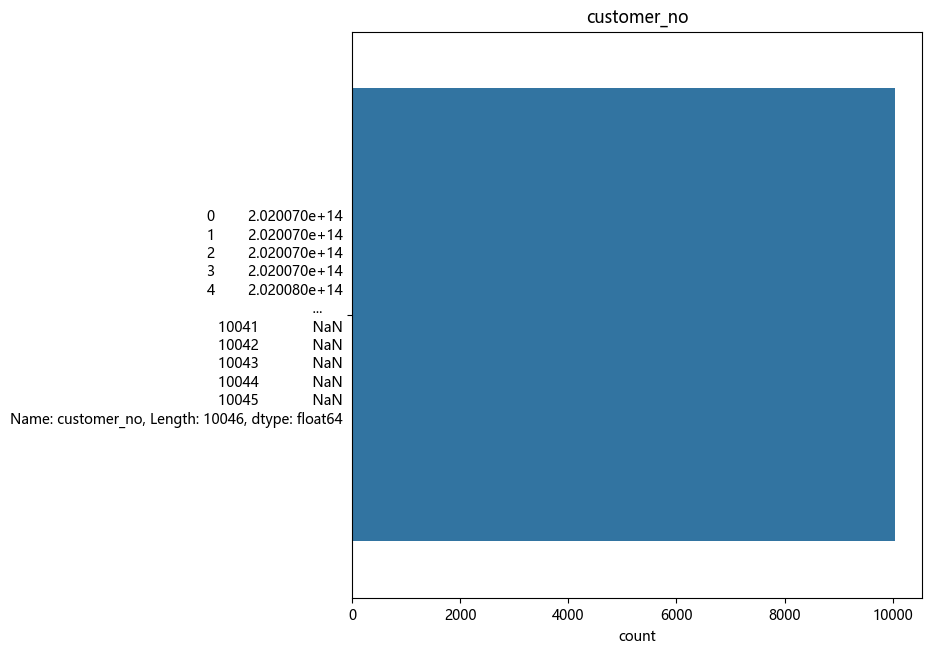

In [8]:
# 类别型变量的违约率分析
yihui_project.eda_module.plot_cate_var(categorical_vars_list,plt_size=(100,100),plt_num=100,x=10,y=10)

In [9]:
# 数值型变量的违约率分析
yihui_project.eda_module.plot_default_num(numeric_vars_list,q=10,plt_size=(100,100),plt_num=100,x=10,y=10)

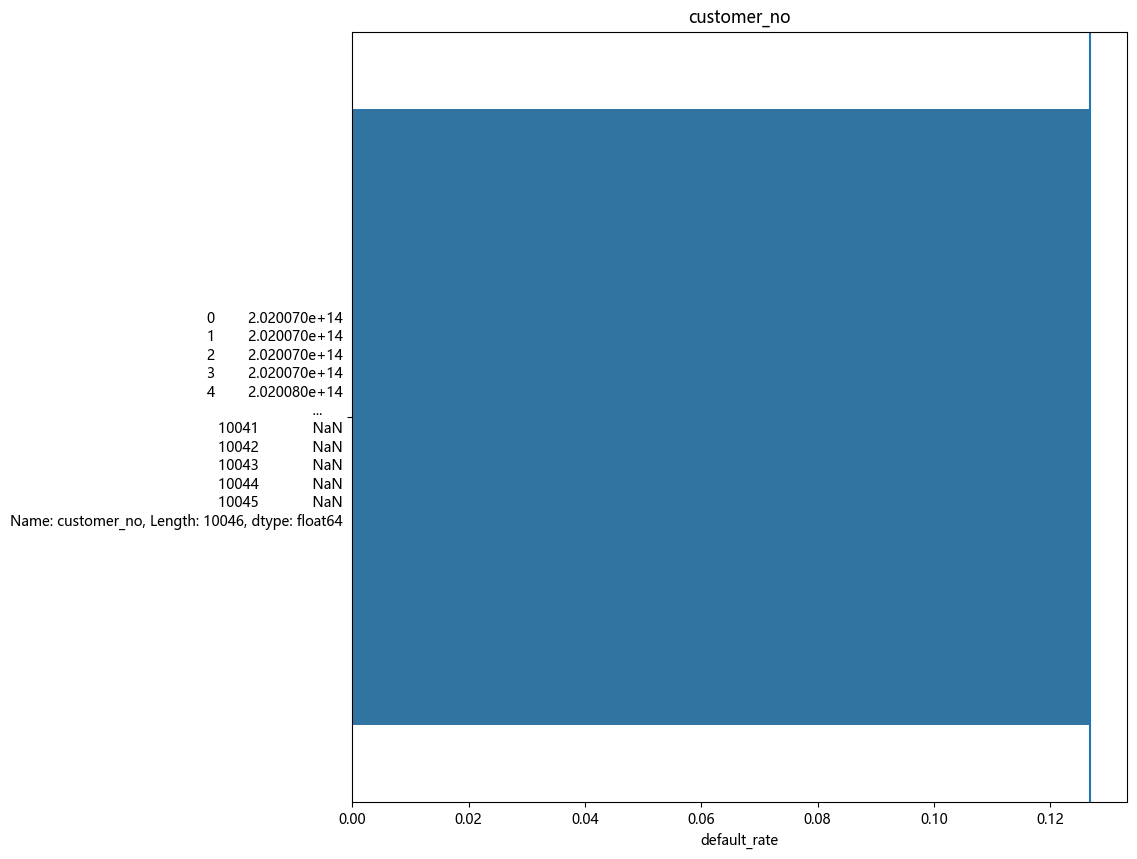

In [10]:
# 类别型变量的违约率分析
yihui_project.eda_module.plot_default_cate(categorical_vars_list,plt_size=(10,10),plt_num=1,x=1,y=1)

plot_bar
                   index  total_obs  missing_count  missing_pct
customer_no  customer_no      10046              0     0.000000
dlq_flag        dlq_flag      10046             46     0.004579
v1                    v1      10046             46     0.004579
v2                    v2      10046             46     0.004579
v3                    v3      10046             46     0.004579
...                  ...        ...            ...          ...
v96                  v96      10046             46     0.004579
v97                  v97      10046             46     0.004579
v98                  v98      10046             46     0.004579
v99                  v99      10046             46     0.004579
v100                v100      10046             46     0.004579

[102 rows x 4 columns]


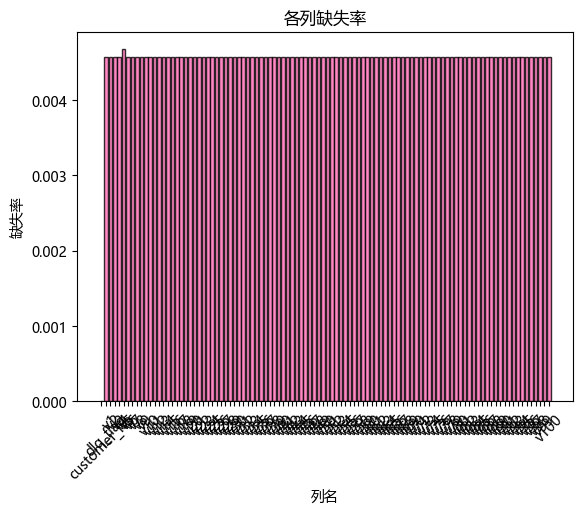

None


In [11]:
# data processing 阶段

# 所有变量缺失值分布图
print(yihui_project.dp_module.plot_bar_missing_var())

plot_bar
                   index  total_obs  missing_count  missing_pct
customer_no  customer_no      10046              0     0.000000
dlq_flag        dlq_flag      10046             46     0.004579
v1                    v1      10046              0     0.000000
v2                    v2      10046              0     0.000000
v3                    v3      10046              0     0.000000
...                  ...        ...            ...          ...
v96                  v96      10046              0     0.000000
v97                  v97      10046              0     0.000000
v98                  v98      10046              0     0.000000
v99                  v99      10046              0     0.000000
v100                v100      10046              0     0.000000

[102 rows x 4 columns]


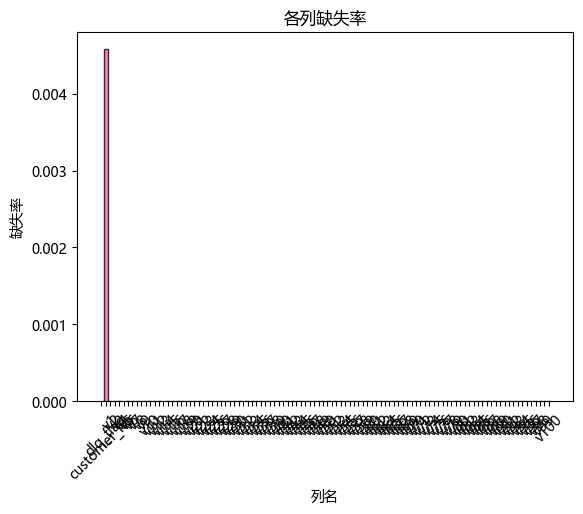

None


In [12]:
# 使用 '0','median','class','rf'
yihui_project.data = yihui_project.dp_module.fillna_num_var(numeric_vars_list, fill_type='0')

# 所有变量缺失值分布图
print(yihui_project.dp_module.plot_bar_missing_var())

In [13]:
# 缺失值剔除
yihui_project.data = yihui_project.dp_module.delete_missing_var(threshold=0.2)
yihui_project.data = yihui_project.dp_module.delete_missing_obs(threshold=5)

print(yihui_project.data)

缺失率超过0.2的变量个数为0
       index  total_obs  missing_count  missing_pct
0          0        102              0     0.000000
1          1        102              0     0.000000
2          2        102              0     0.000000
3          3        102              0     0.000000
4          4        102              0     0.000000
...      ...        ...            ...          ...
10041  10041        102              1     0.009804
10042  10042        102              1     0.009804
10043  10043        102              1     0.009804
10044  10044        102              1     0.009804
10045  10045        102              1     0.009804

[10046 rows x 4 columns]
含有超过5个缺失值的样本数量为0
                                             customer_no  dlq_flag        v1  \
0      0        2.020070e+14\n1        2.020070e+14\n...       1.0  130.1491   
1      0        2.020070e+14\n1        2.020070e+14\n...       1.0  223.6068   
2      0        2.020070e+14\n1        2.020070e+14\n...       1.0  152.7525 

In [14]:
# 常变量/同值化处理
yihui_project.data = yihui_project.dp_module.const_delete(threshold=0.5)
# print(yihui_project.dp_module.const_delete(threshold=0.9).columns)
print(yihui_project.get_numeric_variables())

删除常变量/同值化处理后的变量个数为8,名字为Index(['v5', 'v16', 'v21', 'v44', 'v58', 'v66', 'v71', 'v96'], dtype='object')
94
['v1', 'v2', 'v3', 'v4', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v17', 'v18', 'v19', 'v20', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v59', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v67', 'v68', 'v69', 'v70', 'v72', 'v73', 'v74', 'v75', 'v76', 'v77', 'v78', 'v79', 'v80', 'v81', 'v82', 'v83', 'v84', 'v85', 'v86', 'v87', 'v88', 'v89', 'v90', 'v91', 'v92', 'v93', 'v94', 'v95', 'v97', 'v98', 'v99', 'v100']


In [15]:
# 目标变量缺失剔除
yihui_project.data = yihui_project.dp_module.target_missing_delete()

删除目标变量缺失的观测数: 46


plot_bar
                   index  total_obs  missing_count  missing_pct
customer_no  customer_no      10000              0          0.0
dlq_flag        dlq_flag      10000              0          0.0
v1                    v1      10000              0          0.0
v2                    v2      10000              0          0.0
v3                    v3      10000              0          0.0
...                  ...        ...            ...          ...
v95                  v95      10000              0          0.0
v97                  v97      10000              0          0.0
v98                  v98      10000              0          0.0
v99                  v99      10000              0          0.0
v100                v100      10000              0          0.0

[94 rows x 4 columns]


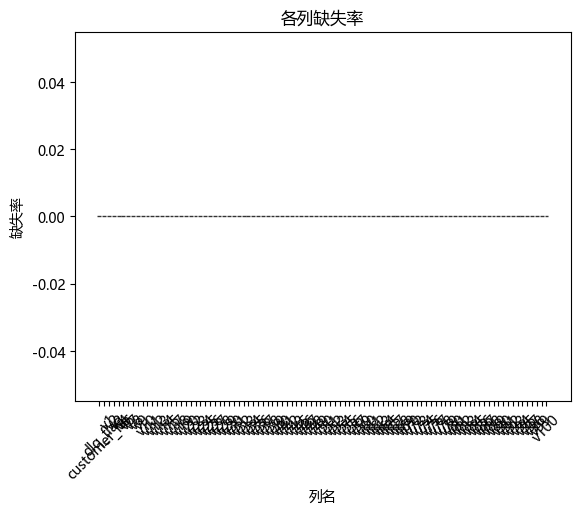

None


10000

In [16]:
# 再检查一下缺失值
print(yihui_project.dp_module.plot_bar_missing_var())

yihui_project.data.shape[0]

In [17]:
# Var_select阶段

# xgboost筛选变量
xg_fea_imp, xg_select_col = yihui_project.var_select_module.select_xgboost(yihui_project.get_numeric_variables())
print(xg_fea_imp)
print(xg_fea_imp['imp'].sum())
print(xg_select_col)


     col       imp
0    v29  0.105945
1    v10  0.040092
2   v100  0.028288
3    v68  0.021895
4    v63  0.016930
..   ...       ...
87   v70  0.005180
88   v78  0.004189
89   v13  0.002360
90   v69  0.000000
91   v89  0.000000

[92 rows x 2 columns]
1.0000002
['v29', 'v10', 'v100', 'v68', 'v63', 'v83', 'v86', 'v80', 'v61', 'v94', 'v25', 'v59', 'v32', 'v39', 'v88', 'v57', 'v36', 'v99', 'v24', 'v27', 'v64', 'v65', 'v73', 'v14', 'v82', 'v72', 'v30', 'v67', 'v3', 'v33', 'v91', 'v42', 'v43', 'v93', 'v11', 'v20', 'v40', 'v46', 'v79', 'v95', 'v51', 'v38', 'v12', 'v34', 'v84', 'v7', 'v48', 'v37', 'v77', 'v55', 'v31', 'v15', 'v22', 'v6', 'v45', 'v54', 'v49', 'v81', 'v8', 'v85', 'v26', 'v17', 'v4', 'v28', 'v9', 'v98', 'v41', 'v47', 'v87', 'v56', 'v1', 'v35', 'v18', 'v53', 'v2', 'v23', 'v52', 'v62', 'v50', 'v90', 'v75', 'v74', 'v60', 'v97', 'v76', 'v92', 'v19', 'v70', 'v78', 'v13', 'v69', 'v89']


In [18]:
# 随机森林筛选变量
rf_fea_imp, rf_select_col = yihui_project.var_select_module.select_rf(yihui_project.get_numeric_variables())
print(rf_fea_imp)
print(rf_fea_imp['imp'].sum())
print(rf_select_col)

    col       imp
0   v17  0.023702
1   v68  0.023326
2   v80  0.022713
3   v94  0.022391
4    v6  0.018002
..  ...       ...
87  v76  0.002453
88  v67  0.001354
89  v13  0.000756
90  v69  0.000498
91  v89  0.000021

[92 rows x 2 columns]
0.9999999999999998
['v17', 'v68', 'v80', 'v94', 'v6', 'v57', 'v9', 'v61', 'v93', 'v64', 'v38', 'v40', 'v36', 'v34', 'v98', 'v29', 'v100', 'v53', 'v4', 'v83', 'v12', 'v39', 'v10', 'v54', 'v99', 'v51', 'v65', 'v43', 'v3', 'v59', 'v63', 'v22', 'v77', 'v25', 'v91', 'v79', 'v37', 'v14', 'v18', 'v95', 'v31', 'v15', 'v8', 'v56', 'v88', 'v46', 'v41', 'v27', 'v52', 'v72', 'v42', 'v81', 'v7', 'v84', 'v85', 'v30', 'v82', 'v24', 'v50', 'v32', 'v1', 'v74', 'v45', 'v26', 'v23', 'v60', 'v48', 'v87', 'v33', 'v86', 'v19', 'v78', 'v92', 'v2', 'v70', 'v20', 'v55', 'v11', 'v75', 'v28', 'v35', 'v90', 'v47', 'v49', 'v97', 'v73', 'v62', 'v76', 'v67', 'v13', 'v69', 'v89']
